REST API to access the data

In [1]:
#libraries

import requests
import pandas as pd

In [2]:
#request activities for a single user id

headers = {"x-functions-key": "WJpDAQqpIbZNa7ANLrlZIzShYYUszrfRNMbdjQv6g66RdW1JLaVAaQ=="}
url = "https://hackapi.azurewebsites.net/api/activities?userId=01E8091B7D4F004EFB77FA332F662C20"
data = requests.get(url, headers=headers)

In [3]:
type(data)

requests.models.Response

In [4]:
data

<Response [200]>

In [5]:
test = pd.read_json(data.content)

In [6]:
test

,id,activityTime,userId,gender,age,labelsJson,basicActivity,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails
0,825b407f-0bd8-4b23-b698-0312539b55fa,2020-09-12T23:59:59,01E8091B7D4F004EFB77FA332F662C20,male,38,None,Personal exercise,NaN,None,None,None,Heartrate threshold matched
1,dd89a81c-fec6-485b-8bfa-0526c2f98ab3,2020-09-02T17:39:36.3766667,01E8091B7D4F004EFB77FA332F662C20,male,38,None,Step Challenge - Helsana Coach App,NaN,"{""Language"":""de"",""TextAngle"":0,""Orientation"":""...",GarminStepsView,Unknown,None
2,af489330-832e-4dbd-9806-05a5f7331942,2020-08-05T23:59:59,01E8091B7D4F004EFB77FA332F662C20,male,38,None,Personal exercise,NaN,None,None,None,Heartrate threshold matched
3,312399c0-26be-41c3-afac-072a85939a08,2020-10-15T20:30:28.11,01E8091B7D4F004EFB77FA332F662C20,male,38,None,Health insurance quiz,NaN,None,None,None,
4,115f077b-0618-428f-8d81-086f91767ff1,2019-12-07T06:51:34.4466667,01E8091B7D4F004EFB77FA332F662C20,male,38,None,December’s recipe cooking challenge,NaN,None,WalkOrJog Images,Walk or Jog,None
...,...,...,...,...,...,...,...,...,...,...,...,...
151,8879311e-263d-416f-bd6a-fb35386e13f5,2020-10-18T21:59:59,01E8091B7D4F004EFB77FA332F662C20,male,38,None,Personal exercise,NaN,None,None,None,Heartrate threshold matched
152,91652c6d-8e1e-4166-9810-fc9d6cfe7675,2018-01-24T18:24:38.1366667,01E8091B7D4F004EFB77FA332F662C20,male,38,None,Personal exercise,NaN,"{""Language"":""de"",""TextAngle"":0,""Orientation"":""...",GarminCircles,Running,None
153,88aac524-dd16-48ed-ac17-fd53c0aa9e10,2020-09-04T23:59:59,01E8091B7D4F004EFB77FA332F662C20,male,38,None,Personal exercise,NaN,None,None,None,Heartrate threshold matched
154,8e77df91-093d-46fe-bf73-fe6948b92f4f,2019-01-03T19:49:09.9233333,01E8091B7D4F004EFB77FA332F662C20,male,38,None,Personal exercise,NaN,"{""Language"":""de"",""TextAngle"":0,""Orientation"":""...",GarminCircles,Biking,None


In [7]:
#request all user ID's to test if there is data for 1125 users as it is claimed by Helsana
url3 = "https://hackapi.azurewebsites.net/api/users"
data3 = requests.get(url3, headers=headers)

test3 = pd.read_json(data3.content)

print(test3.shape)
test3.head()

(1125, 1)


,0
0,0013B973C1E2C7662D904037D89A2A8B
1,004A92AA05A50D68A09C066C10EBCFF4
2,0083F6C6C31BE8B28034235F7D4BDB88
3,00BD17D5330389C4293CC1F439B60108
4,00CE010620E5BA66CDF6F1935A6125FE


In [8]:
#request whole data 190502 activities (rows) & 12 variables (takes a bit longer)

url4 = "https://hackapi.azurewebsites.net/api/activities"
data4 = requests.get(url4, headers=headers)

test4 = pd.read_json(data4.content)
print(test4.shape)
test4.head()

(190502, 12)


,id,activityTime,userId,gender,age,labelsJson,basicActivity,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails
0,370a099d-0f4f-4d56-904c-0000abc12f5b,2021-02-01T09:34:11,E2B39F280A278DA6812DE2077C9BB875,female,32,None,Session mindfulness Coach,None,None,None,None,"{""ActivityType"":""Session completed"",""CategoryT..."
1,d659fddd-912b-43a1-a2a1-0000be69b7c6,2021-02-02T21:02:31,F1934EEED4F09FE6898180B03E576C37,female,39,None,Weekly Bonus Coach,None,None,None,None,
2,987d288a-b015-4f3a-917b-0000f553ebe7,2019-07-08T20:56:05.42,F449340C6FE2C6C8807C3D56DF1AE8B0,male,69,None,Personal exercise,None,None,WorkoutImages,HomeWorkout,None
3,e59fd899-7378-4f0f-af92-000179ad68a0,2020-11-17T06:32:24,B74F100845A3B437D0B12E35206278B8,female,44,None,Daily session,None,None,None,None,"{""ActivityType"":""Session completed"",""CategoryT..."
4,53d4c471-70df-4537-abb4-0001c4b2f6db,2020-09-18T16:22:24,E76296769049FE788FF64F17EF155085,male,61,None,Daily session,None,None,None,None,"{""ActivityType"":""Session completed"",""CategoryT..."


In [91]:
test4.groupby('gender').count()

,id,activityTime,userId,age,labelsJson,basicActivity,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails,date,dayofyear
gender,,,,,,,,,,,,,
female,103839,103839,103839,103839,10219,103839,9581,29482,39820,39820,64019,103839,103839
male,86663,86663,86663,86663,8006,86663,6994,22815,31413,31413,55250,86663,86663


In [92]:
activity_num = test4.groupby('userId').size().sort_values()
activity_num.head()

userId
62D5D8A8BD27D67C0A66409A7F9E2F38    1
5A790B4C11798AFA3A78AAE0B4A8A7DF    1
575EC26D3B1D09424CC342279B1F6664    1
458BCEC8844AF81DF9BF3C36E8663178    1
5DF46021643B221185556FF94C75B399    1
dtype: int64

In [93]:
num_women = test4[test4.gender=='female'].count()[0]
num_men = test4[test4.gender=='male'].count()[0]
num_women / (num_women+num_men)

0.5450808915391965

In [94]:
# number of people who had more than 12 activities per year
activity_num[activity_num > 12].count() 

1023

In [95]:
activity_num.median() 

119.0

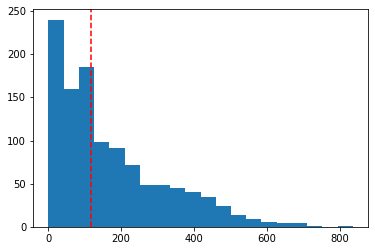

In [125]:
import matplotlib.pyplot as plt
plt.hist(activity_num, bins=20)
plt.axvline(activity_num.median(), color='r', linestyle='dashed')

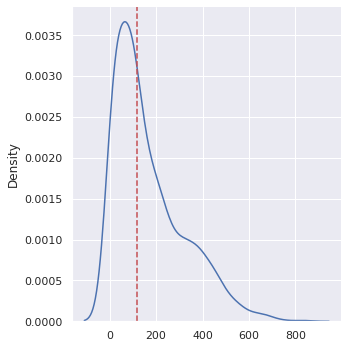

In [132]:
import seaborn as sns
sns.set(style="darkgrid")
sns.displot(activity_num, kind="kde")
plt.axvline(activity_num.median(), color='r', linestyle='dashed')

In [97]:
test4.age.sort_values()

79789      0
189693     0
24497      0
109607     0
132506    13
          ..
173730    85
30998     85
84276     85
131051    86
95515     86
Name: age, Length: 190502, dtype: int64

In [98]:
count_user = test4.groupby('userId').count()
count_user.head()

,id,activityTime,gender,age,labelsJson,basicActivity,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails,date,dayofyear
userId,,,,,,,,,,,,,
0013B973C1E2C7662D904037D89A2A8B,27,27,27,27,17,27,1,8,19,19,8,27,27
004A92AA05A50D68A09C066C10EBCFF4,395,395,395,395,12,395,3,31,75,75,320,395,395
0083F6C6C31BE8B28034235F7D4BDB88,307,307,307,307,65,307,19,32,159,159,148,307,307
00BD17D5330389C4293CC1F439B60108,293,293,293,293,8,293,1,8,10,10,283,293,293
00CE010620E5BA66CDF6F1935A6125FE,2,2,2,2,1,2,1,1,1,1,1,2,2


In [99]:
# it seems that 'screenshotFindingsJson' is only applied to personal exercise activities
test4[~test4["screenshotFindingsJson"].str.contains('None', na=True)].groupby('basicActivity').count()

,id,activityTime,userId,gender,age,labelsJson,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails,date,dayofyear
basicActivity,,,,,,,,,,,,,
Personal exercise,16575,16575,16575,16575,16575,8201,16575,13764,16575,16575,0,16575,16575


In [100]:
test4[~test4["screenshotFindingsDetailsJson"].str.contains('None', na=True)].groupby('basicActivity').count()

,id,activityTime,userId,gender,age,labelsJson,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails,date,dayofyear
basicActivity,,,,,,,,,,,,,
24h World Cup challenge,14,14,14,14,14,0,0,14,14,14,0,14,14
Advent’s recipe cooking,15,15,15,15,15,0,0,15,15,15,0,15,15
April’s recipe cooking challenge,90,90,90,90,90,36,0,90,90,90,0,90,90
August’s recipe cooking challenge,109,109,109,109,109,55,0,109,109,109,0,109,109
Awaken the Nao in you,2,2,2,2,2,0,0,2,2,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Using myHelsana,572,572,572,572,572,152,0,572,572,572,0,572,572
Vitamin-rich snacking,80,80,80,80,80,77,0,80,80,80,0,80,80
Volunteer work,1,1,1,1,1,0,0,1,1,1,0,1,1


In [101]:
test4[~test4["labelsJson"].str.contains('None', na=True)].groupby('basicActivity').count().sort_values('id', ascending=False)

,id,activityTime,userId,gender,age,labelsJson,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails,date,dayofyear
basicActivity,,,,,,,,,,,,,
Personal exercise,13126,13126,13126,13126,13126,13126,8201,7520,13126,13126,0,13126,13126
Trails App Run,420,420,420,420,420,420,0,415,420,420,0,420,420
Spring clean,308,308,308,308,308,308,0,30,308,308,0,308,308
Long-term policy,304,304,304,304,304,304,0,300,304,304,0,304,304
Helsana+ survey first half year,297,297,297,297,297,297,0,297,297,297,0,297,297
Social memberships,247,247,247,247,247,247,0,216,247,247,0,247,247
Vitamin-rich snacking,230,230,230,230,230,230,0,77,230,230,0,230,230
Sports and fitness membership,226,226,226,226,226,226,0,207,226,226,0,226,226
Gym membership,212,212,212,212,212,212,0,201,212,212,0,212,212


In [102]:
test4[test4["basicActivity"].str.contains('Personal exercise')].count()

id                               92013
activityTime                     92013
userId                           92013
gender                           92013
age                              92013
labelsJson                       13126
basicActivity                    92013
screenshotFindingsJson           16575
screenshotFindingsDetailsJson    39134
imageClass                       52651
recognizedActivity               52651
activityDetails                  39362
date                             92013
dayofyear                        92013
dtype: int64

In [103]:
# most popular activity categories
test4.groupby('basicActivity').size().sort_values().tail(20)

basicActivity
Social memberships                         574
Using myHelsana                            582
Helsana+ survey                            592
Sports and fitness membership              631
Step Challenge - Helsana Coach App         632
The elderberry quiz                        702
Medical early detection                    816
Gym membership                             851
Longstanding customers                     910
Weekly Bonus Coach                        1085
Helsana+ survey first half year           1108
Long-term policy                          1128
Helsana+ survey second half-year 2020     1162
Weekly Bonus                              5692
Session nutrition Coach                   5896
Daily Session Movement Coach              6027
Session mindfulness Coach                 6105
Trails App Run                           18079
Daily session                            32548
Personal exercise                        92013
dtype: int64

In [104]:
# most active user
max_active = test4[test4.userId=='2BD0AFC98F846769BAC6CF964F5497DC'].sort_values('date')
max_active.head()

,id,activityTime,userId,gender,age,labelsJson,basicActivity,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails,date,dayofyear
11379,8c78cfd7-56bc-4094-bc1c-0f5116e9f6be,2017-10-04T19:36:31.1966667,2BD0AFC98F846769BAC6CF964F5497DC,female,49,None,Get quotes online,None,"{""Language"":""it"",""TextAngle"":0,""Orientation"":""...",,Unknown,None,2017-10-04,277
184243,f60cf7d6-ba86-44cb-84f0-f7bb4d095bf0,2017-10-04T19:17:18.0333333,2BD0AFC98F846769BAC6CF964F5497DC,female,49,None,Using myHelsana,None,"{""Language"":""it"",""TextAngle"":0,""Orientation"":""...",GoogleFitSteps,Unknown,None,2017-10-04,277
100529,8d15f494-5fb7-4348-8a2d-87123169b2d4,2017-10-05T14:34:55.8533333,2BD0AFC98F846769BAC6CF964F5497DC,female,49,None,Long-term policy,None,"{""Language"":""en"",""TextAngle"":0,""Orientation"":""...",,Unknown,None,2017-10-05,278
39474,b705896b-9535-4b28-b7ff-354bd39c3138,2017-10-05T08:40:35.5066667,2BD0AFC98F846769BAC6CF964F5497DC,female,49,None,Helsana+ survey,None,"{""Language"":""it"",""TextAngle"":0,""Orientation"":""...",Trails,Unknown,None,2017-10-05,278
38993,6cc5c0ba-a223-489f-89a9-34ac044373f2,2017-10-05T07:20:29.6066667,2BD0AFC98F846769BAC6CF964F5497DC,female,49,None,Medical early detection,None,"{""Language"":""it"",""TextAngle"":0,""Orientation"":""...",PolarSteps,Unknown,None,2017-10-05,278


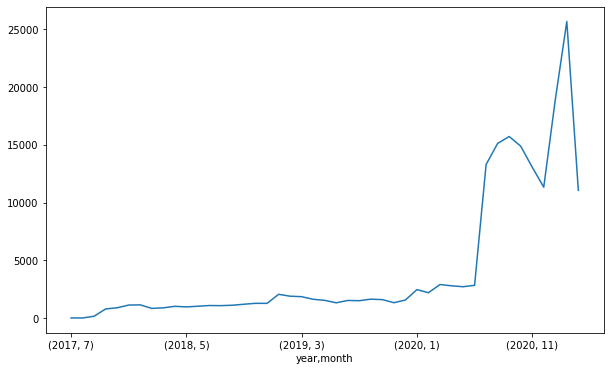

In [105]:
# activities by time
test4['date'] = pd.to_datetime(test4['date'], errors='coerce')
test4['date'].groupby([test4.date.dt.year.rename('year'), test4.date.dt.month.rename('month')]).agg('count').plot(figsize=(10,6))

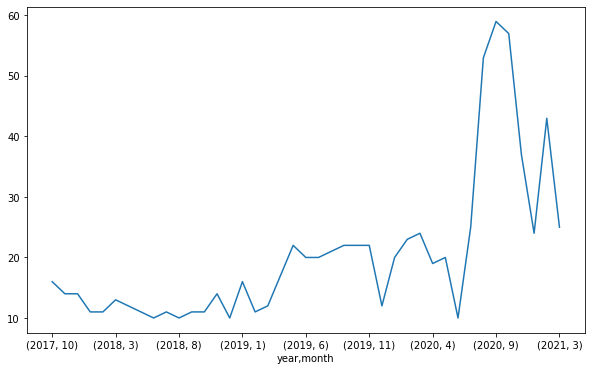

In [106]:
# activities of most active user
max_active['date'] = pd.to_datetime(max_active['date'], errors='coerce')
max_active['date'].groupby([max_active.date.dt.year.rename('year'), max_active.date.dt.month.rename('month')]).agg('count').plot(figsize=(10,6))

In [107]:
test4.activityTime.head()

0       2021-02-01T09:34:11
1       2021-02-02T21:02:31
2    2019-07-08T20:56:05.42
3       2020-11-17T06:32:24
4       2020-09-18T16:22:24
Name: activityTime, dtype: object

In [108]:
test4['date'] = test4['activityTime'].str[:10]
test4.date.head()

0    2021-02-01
1    2021-02-02
2    2019-07-08
3    2020-11-17
4    2020-09-18
Name: date, dtype: object

In [109]:
# extracting day of year of a given activity
test4['dayofyear'] = pd.to_datetime(test4['date']).dt.dayofyear
test4.tail()

,id,activityTime,userId,gender,age,labelsJson,basicActivity,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails,date,dayofyear
190497,46fa0d8d-22a1-4daa-8e47-fffe67ff404a,2020-12-03T23:59:59,1E2CE01879F4F10DA7CC9562C1B1091D,female,28,None,Personal exercise,None,None,None,None,Steps thershold matched,2020-12-03,338
190498,68894240-6f0f-43da-8243-ffff3cb9cbc9,2021-01-02T13:58:54,FDAB98DBACEFAE2C49B1BB87097A1861,male,16,None,Daily session,None,None,None,None,"{""ActivityType"":""Session completed"",""CategoryT...",2021-01-02,2
190499,b2accff3-da1d-4f3b-892d-ffff980d731b,2021-01-10T08:46:13,CEAA906C66C082DF3FA3AB3475F22E1D,male,45,None,Daily session,None,None,None,None,"{""ActivityType"":""Session completed"",""CategoryT...",2021-01-10,10
190500,dc75107f-8ba3-48be-8f27-ffff9e390d1b,2020-07-16T20:24:59,DF344BA7221C68C281C944D8A4FF4F3E,female,57,None,Daily session,None,None,None,None,"{""ActivityType"":""Session completed"",""CategoryT...",2020-07-16,198
190501,d827b60f-fa56-4eeb-bd50-fffff9d2e2a3,2018-09-12T11:04:57.4433333,658A7F00DB344BD77B54A751AB417D7C,male,30,None,Personal exercise,None,"{""Language"":""de"",""TextAngle"":0,""Orientation"":""...",TrackerXBlue,Running,None,2018-09-12,255


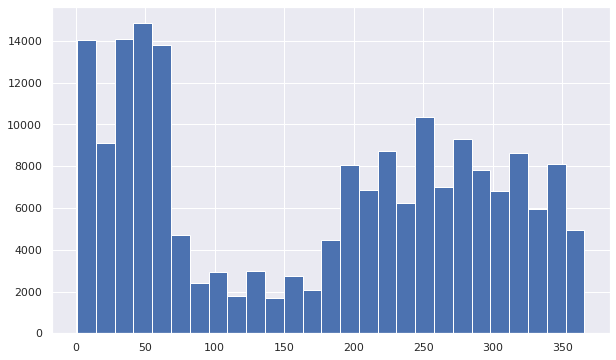

In [137]:
# grouped by days of the year
test4.dayofyear.hist(bins=27, figsize=(10,6))

In [111]:
# appart from WorkoutImages, NA, WalkOrJog Images, BikeImages, Hiking Images, and RidingImages all images are of fitness apps / trackers
test4.groupby('imageClass').count().sort_values(by='id', ascending=False)

,id,activityTime,userId,gender,age,labelsJson,basicActivity,screenshotFindingsJson,screenshotFindingsDetailsJson,recognizedActivity,activityDetails,date,dayofyear
imageClass,,,,,,,,,,,,,
WorkoutImages,11659,11659,11659,11659,11659,4523,11659,1909,0,11659,0,11659,11659
,9171,9171,9171,9171,9171,2654,9171,1776,9171,9171,0,9171,9171
Watches,5954,5954,5954,5954,5954,1546,5954,1822,5954,5954,0,5954,5954
Trails,5579,5579,5579,5579,5579,1302,5579,664,5579,5579,0,5579,5579
AppleHealth,4934,4934,4934,4934,4934,596,4934,1524,4934,4934,0,4934,4934
WalkOrJog Images,4084,4084,4084,4084,4084,1687,4084,679,0,4084,0,4084,4084
FitBitSteps,3223,3223,3223,3223,3223,251,3223,896,3223,3223,0,3223,3223
BikeImages,3058,3058,3058,3058,3058,1402,3058,317,3058,3058,0,3058,3058
Hiking Images,3023,3023,3023,3023,3023,1132,3023,210,0,3023,0,3023,3023


In [112]:
# it appears that steps, motivation exercises and free running are popular
test4.groupby('activityDetails').count().sort_values(by='id', ascending=False)

,id,activityTime,userId,gender,age,labelsJson,basicActivity,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,date,dayofyear
activityDetails,,,,,,,,,,,,,
Steps thershold matched,26273,26273,26273,26273,26273,0,26273,0,0,0,0,26273,26273
"{""ActivityType"":""Session completed"",""CategoryType"":""Mindfulness activity completed"",""SubcategoryType"":""Motivation excercise completed""}",17889,17889,17889,17889,17889,0,17889,0,0,0,0,17889,17889
Free run completed,17225,17225,17225,17225,17225,0,17225,0,0,0,0,17225,17225
"{""ActivityType"":""Session completed"",""CategoryType"":""Movement activity completed"",""SubcategoryType"":""Strength excercise completed""}",16004,16004,16004,16004,16004,0,16004,0,0,0,0,16004,16004
"{""ActivityType"":""Session completed"",""CategoryType"":""Nutrition activity completed"",""SubcategoryType"":""HealthyEating completed""}",15864,15864,15864,15864,15864,0,15864,0,0,0,0,15864,15864
Heartrate threshold matched,13089,13089,13089,13089,13089,0,13089,0,0,0,0,13089,13089
,9183,9183,9183,9183,9183,0,9183,0,0,0,0,9183,9183
"{""ActivityType"":""Program completed"",""CategoryType"":""Nutrition activity completed"",""SubcategoryType"":""HealthyEating completed""}",1331,1331,1331,1331,1331,0,1331,0,0,0,0,1331,1331
"{""ActivityType"":""Program completed"",""CategoryType"":""Mindfulness activity completed"",""SubcategoryType"":""Motivation excercise completed""}",1236,1236,1236,1236,1236,0,1236,0,0,0,0,1236,1236


In [113]:
test4.sort_values('date')

,id,activityTime,userId,gender,age,labelsJson,basicActivity,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails,date,dayofyear
20694,47fd7b02-5682-4cf8-ae4f-1c03dbe6e9d6,2017-07-11T17:41:29.3066667,263C9C0401A30384E161D25BAE0169BC,male,47,None,Using myHelsana,None,"{""Language"":""de"",""TextAngle"":0,""Orientation"":""...",,Unknown,None,2017-07-11,192
34359,ac9dfcc9-b8f4-47e3-a6c0-2e5c1a75f86b,2017-07-11T17:38:33.66,263C9C0401A30384E161D25BAE0169BC,male,47,None,Sports and fitness membership,None,"{""Language"":""en"",""TextAngle"":0,""Orientation"":""...",,Unknown,None,2017-07-11,192
159264,b8744510-82ca-4883-bf6a-d623e83e4df3,2017-07-11T17:27:50.6766667,CF227F250B20750FAE32A48659D24084,female,32,None,Using myHelsana,None,"{""Language"":""de"",""TextAngle"":0,""Orientation"":""...",Trails,Unknown,None,2017-07-11,192
190475,46b210a7-beaa-4f1e-a039-fff4a6a0c3db,2017-07-11T17:28:37.66,CF227F250B20750FAE32A48659D24084,female,32,None,Long-term policy,None,"{""Language"":""de"",""TextAngle"":0,""Orientation"":""...",GoogleFitActivities,Unknown,None,2017-07-11,192
72810,2033a653-ecd2-4a2e-84c1-620018a5df55,2017-07-12T17:28:56.7633333,263C9C0401A30384E161D25BAE0169BC,male,47,None,Personal exercise,None,"{""Language"":""de"",""TextAngle"":0,""Orientation"":""...",,Running,None,2017-07-12,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116736,011f7c6b-8487-4235-88f7-9d086b60f142,2021-03-12T08:33:07,C7C9A2E2590D18959FDD062F03E2F2EC,female,52,None,Session mindfulness Coach,None,None,None,None,"{""ActivityType"":""Session completed"",""CategoryT...",2021-03-12,71
42547,0f69c46d-2192-417a-a3ee-395ade595025,2021-03-12T05:39:07,5DC40C7E030F104FC7DB5F04A5FDB975,female,13,None,Session nutrition Coach,None,None,None,None,"{""ActivityType"":""Session completed"",""CategoryT...",2021-03-12,71
118916,1e565bfb-406a-46da-b826-a0128b292886,2021-03-12T06:24:01,5E16D4E846B22F00429692B9BADFA394,female,41,None,Daily Session Movement Coach,None,None,None,None,"{""ActivityType"":""Program completed"",""CategoryT...",2021-03-12,71
34420,4fec9bd3-51f2-4ea9-a14e-2e7803b61532,2021-03-12T07:13:13,B4A13AB2F9793A90EBC8380815757220,female,28,None,Session mindfulness Coach,None,None,None,None,"{""ActivityType"":""Session completed"",""CategoryT...",2021-03-12,71


In [114]:
test4.groupby('basicActivity').count()

,id,activityTime,userId,gender,age,labelsJson,screenshotFindingsJson,screenshotFindingsDetailsJson,imageClass,recognizedActivity,activityDetails,date,dayofyear
basicActivity,,,,,,,,,,,,,
24h World Cup challenge,76,76,76,76,76,0,0,14,76,76,0,76,76
Advent’s recipe cooking,43,43,43,43,43,0,0,15,43,43,0,43,43
April’s recipe cooking challenge,225,225,225,225,225,106,0,90,225,225,0,225,225
August’s recipe cooking challenge,222,222,222,222,222,125,0,109,222,222,0,222,222
Awaken the Nao in you,33,33,33,33,33,0,0,2,33,33,0,33,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volunteer work,1,1,1,1,1,0,0,1,1,1,0,1,1
Weekly Bonus,5692,5692,5692,5692,5692,0,0,0,0,0,5692,5692,5692
Weekly Bonus Coach,1085,1085,1085,1085,1085,0,0,0,0,0,1085,1085,1085
